# **1. Preparação do ambiente e dos dados **

In [ ]:
#importando a libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from io import StringIO
from graphviz import *


In [ ]:
#importando os dados
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/Fase 5 - FIAP IA/crop_yield.csv'




Mounted at /content/drive


In [ ]:
#tratando dados incorretos o data frame

df = pd.read_csv(file_path)

new_column_names = {
'Crop': 'Cultura',
'Precipitation (mm day-1)': 'Precipitacao',
'Specific Humidity at 2 Meters (g/kg)': 'Umidade_Especifica',
'Relative Humidity at 2 Meters (%)': 'Umidade_Relativa',
'Temperature at 2 Meters (C)': 'Temperatura',
'Yield': 'Rendimento'
}

df = df.rename(columns = new_column_names)

df['Cultura'] = df['Cultura'].str.replace('Oil palm fruit', 'Oil palm, fruit')

print("Verificando a correção nas linhas 40 a 45:")
print(df.iloc[40:45])
print("\n" + "="*50 + "\n")


Verificando a correção nas linhas 40 a 45:
            Cultura  Precipitacao  Umidade_Especifica  Umidade_Relativa  \
40  Oil palm, fruit       1938.42               17.54             82.11   
41  Oil palm, fruit       2301.54               17.81             82.79   
42  Oil palm, fruit       2592.35               17.61             85.07   
43  Oil palm, fruit       2344.72               17.61             84.12   
44  Oil palm, fruit       2339.30               17.70             84.54   

    Temperatura  Rendimento  
40        26.11      201436  
41        26.24      152343  
42        25.56      181826  
43        25.76      178183  
44        25.76      169781  




In [ ]:
#redefinindo as colunas
df[['Produto', 'Tipo_Produto']] = df['Cultura'].str.split(', ', n=1, expand=True)

print("DataFrame com as novas colunas 'Produto' e 'Tipo_Produto':")
print(df.head())
print("\n" + "="*50 + "\n")

DataFrame com as novas colunas 'Produto' e 'Tipo_Produto':
        Cultura  Precipitacao  Umidade_Especifica  Umidade_Relativa  \
0  Cocoa, beans       2248.92               17.72             83.40   
1  Cocoa, beans       1938.42               17.54             82.11   
2  Cocoa, beans       2301.54               17.81             82.79   
3  Cocoa, beans       2592.35               17.61             85.07   
4  Cocoa, beans       2344.72               17.61             84.12   

   Temperatura  Rendimento Produto Tipo_Produto  
0        26.01       11560   Cocoa        beans  
1        26.11       11253   Cocoa        beans  
2        26.24        9456   Cocoa        beans  
3        25.56        9321   Cocoa        beans  
4        25.76        8800   Cocoa        beans  




In [ ]:
#removendo coluna cultura
df = df.drop('Cultura', axis=1)

#check
print("DataFrame final após a remoção da coluna 'Cultura':")
print(df.head())

DataFrame final após a remoção da coluna 'Cultura':
   Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  \
0       2248.92               17.72             83.40        26.01   
1       1938.42               17.54             82.11        26.11   
2       2301.54               17.81             82.79        26.24   
3       2592.35               17.61             85.07        25.56   
4       2344.72               17.61             84.12        25.76   

   Rendimento Produto Tipo_Produto  
0       11560   Cocoa        beans  
1       11253   Cocoa        beans  
2        9456   Cocoa        beans  
3        9321   Cocoa        beans  
4        8800   Cocoa        beans  


# **Tratamento dos dados**

Nesta etapa, realizamos a importação dos dados e padronização dos campos facilitando analises futuras. No processo, observamos que a coluna cultura poderia ser separada em duas colunas Produto e Tipo_Produto:

- Produto: descreve o produto que está sendo cultivado.
- Tipo_produto: classifica os cultivos em categoria maiores, como "grãos".

Todavia, para realizar isso notamos que faltava uma vírgula em algumas das linhas dos dados e procedemos a correção antes de realizar o "split".


# **2. Analise Exploratória dos dados**

In [ ]:
#overview dos dados
print("Informações do DataFrame:")
df.info()

print("Estatísticas descritivas do DataFrame:")
print(df.describe())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Precipitacao        156 non-null    float64
 1   Umidade_Especifica  156 non-null    float64
 2   Umidade_Relativa    156 non-null    float64
 3   Temperatura         156 non-null    float64
 4   Rendimento          156 non-null    int64  
 5   Produto             156 non-null    object 
 6   Tipo_Produto        156 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.7+ KB
Estatísticas descritivas do DataFrame:
       Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  \
count    156.000000          156.000000        156.000000    156.00000   
mean    2486.498974           18.203077         84.737692     26.18359   
std      289.457914            0.293923          0.996226      0.26105   
min     1934.620000           17

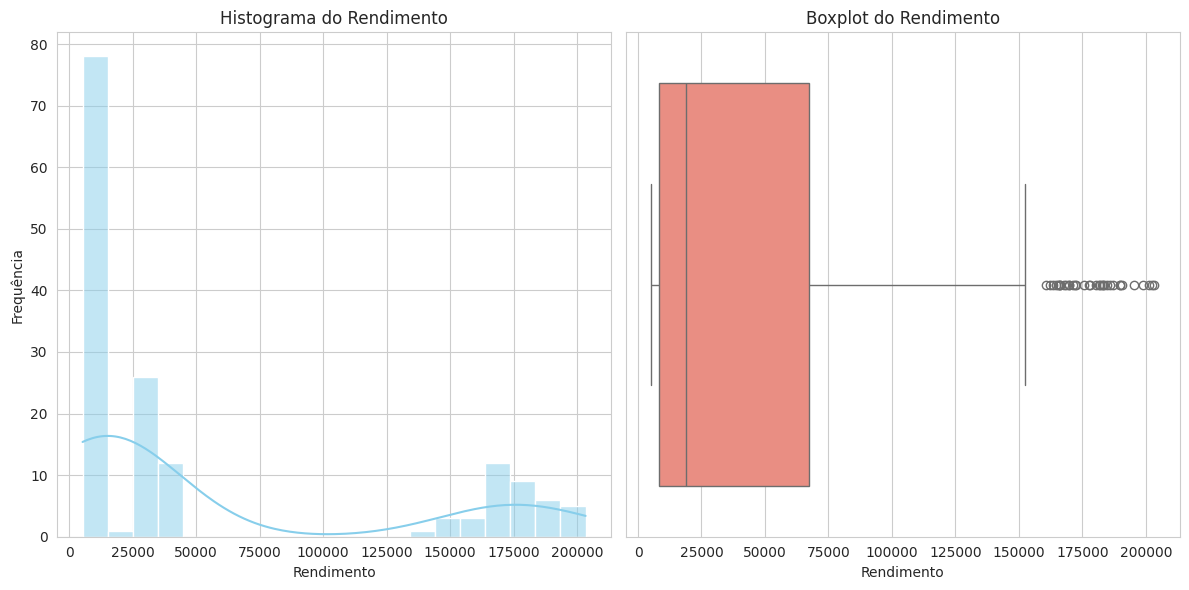

In [ ]:
###Entendendo o comportamento da variavel alvo: Rendimento

#histograma
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Rendimento'], bins=20, kde=True, color='skyblue')
plt.title('Histograma do Rendimento')
plt.xlabel('Rendimento')
plt.ylabel('Frequência')

#boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rendimento'], color='salmon')
plt.title('Boxplot do Rendimento')
plt.xlabel('Rendimento')

plt.tight_layout()
plt.show()

In [ ]:
#Outliers do boxplot

#Intervalo Inter-quartil

q1 = df['Rendimento'].quantile(0.25)
q3 = df['Rendimento'].quantile(0.75)
iqr = q3 - q1

#Limites
lower_bound = q1 - 1.5 * iqr
higher_bound = q3 + 1.5 * iqr

#Contagem de Outliers
outliers = df[(df['Rendimento'] < lower_bound) | (df['Rendimento'] > higher_bound)]
num_outliers = len(outliers)

print(f"Número de outliers: {num_outliers}")

Número de outliers: 35


In [ ]:
#Lista de outliers do boxplot
print(outliers.sort_values(by='Rendimento', ascending=False))
print(outliers)


    Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  \
72       2604.59               18.19             83.44        26.43   
73       2308.51               18.27             83.65        26.47   
40       1938.42               17.54             82.11        26.11   
75       2967.41               18.67             85.48        26.46   
66       3085.79               18.34             86.10        26.03   
64       2892.78               18.49             86.09        26.18   
77       2109.34               18.51             83.52        26.72   
76       2333.46               18.50             84.85        26.43   
70       2771.73               18.38             84.98        26.30   
69       2938.29               18.22             85.42        26.06   
63       2363.63               18.35             84.92        26.28   
65       2729.53               18.41             86.03        26.11   
47       2061.61               17.80             84.36        25.88   
67    

In [ ]:
#aprofundando Oil Palm

df_oil_palm = df[df['Produto'] == 'Oil palm']
estatisticas_oil_palm = df_oil_palm.describe()

print("Estatísticas Descritivas para 'Oil palm':")
print(estatisticas_oil_palm)

#Comparação isolada com demais produtos
df_sem_oil_palm = df[df['Produto'] != 'Oil palm'].copy()

print("Estatísticas descritivas para todos os produtos, EXCETO 'Oil palm':")
print(df_sem_oil_palm.describe())

Estatísticas Descritivas para 'Oil palm':
       Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  \
count     39.000000           39.000000         39.000000    39.000000   
mean    2486.498974           18.203077         84.737692    26.183590   
std      292.300450            0.296809          1.006009     0.263613   
min     1934.620000           17.540000         82.110000    25.560000   
25%     2305.750000           18.060000         84.175000    26.025000   
50%     2424.550000           18.270000         84.850000    26.130000   
75%     2705.210000           18.390000         85.495000    26.290000   
max     3085.790000           18.700000         86.100000    26.810000   

          Rendimento    Cluster  Distancia_Centroides  
count      39.000000  39.000000             39.000000  
mean   175804.692308   1.794872              0.885955  
std     14919.869752   1.260315              0.384587  
min    142425.000000   0.000000              0.105619  
25%    1660

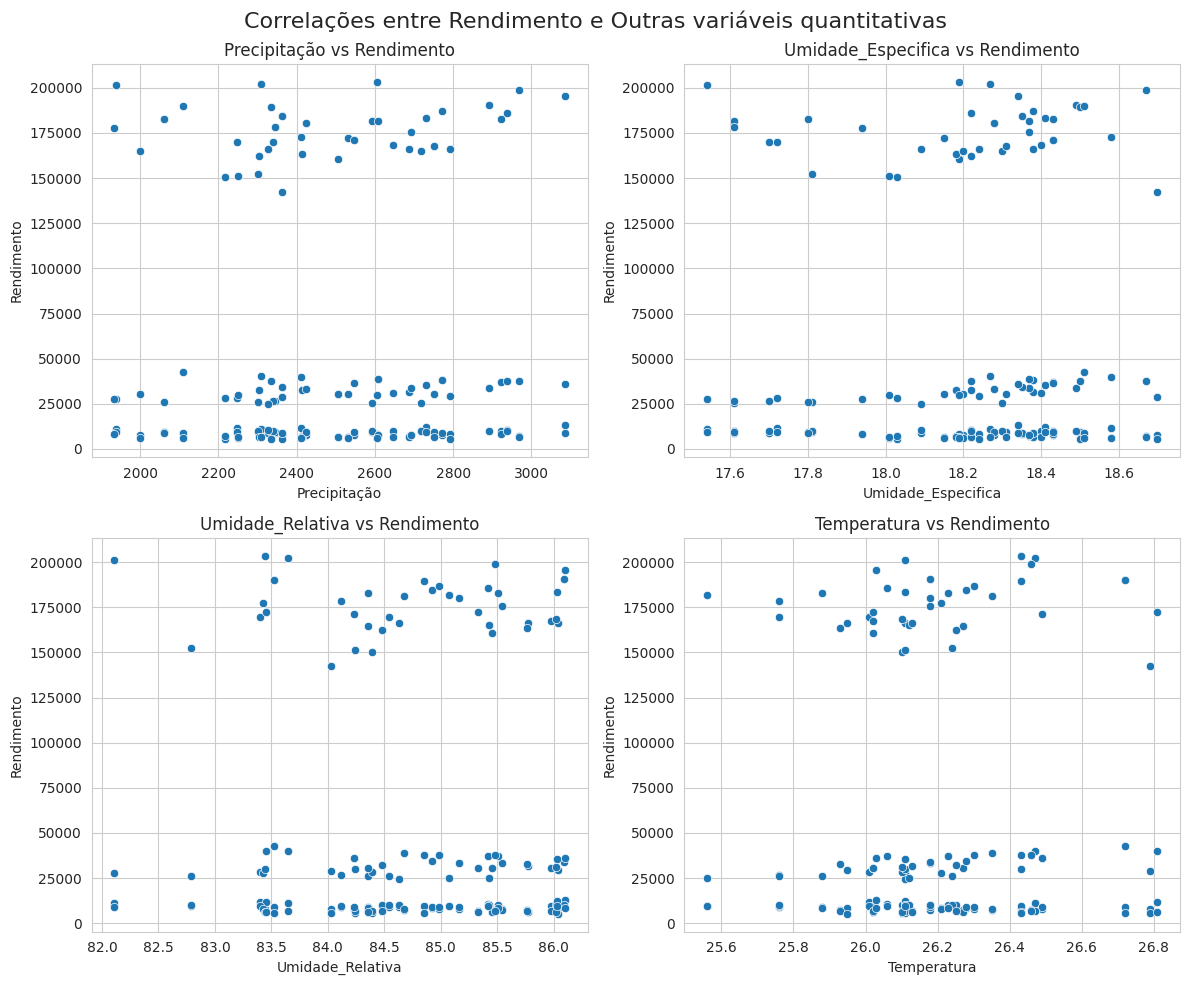

In [ ]:
#Entendendo correlações entre rendimento e outras variaveis quantitativas

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Correlações entre Rendimento e Outras variáveis quantitativas', fontsize=16)

# vs Precipitação
sns.scatterplot(x='Precipitacao', y='Rendimento', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Precipitação vs Rendimento')
axes[0, 0].set_xlabel('Precipitação')
axes[0, 0].set_ylabel('Rendimento')

# vs Umidade_Especifica
sns.scatterplot(x='Umidade_Especifica', y='Rendimento', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Umidade_Especifica vs Rendimento')
axes[0, 1].set_xlabel('Umidade_Especifica')
axes[0, 1].set_ylabel('Rendimento')

# vs Umidade_Relativa
sns.scatterplot(x='Umidade_Relativa', y='Rendimento', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Umidade_Relativa vs Rendimento')
axes[1, 0].set_xlabel('Umidade_Relativa')
axes[1, 0].set_ylabel('Rendimento')

# vs Temperatura
sns.scatterplot(x='Temperatura', y='Rendimento', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Temperatura vs Rendimento')
axes[1, 1].set_xlabel('Temperatura')
axes[1, 1].set_ylabel('Rendimento')

plt.tight_layout()
plt.show()

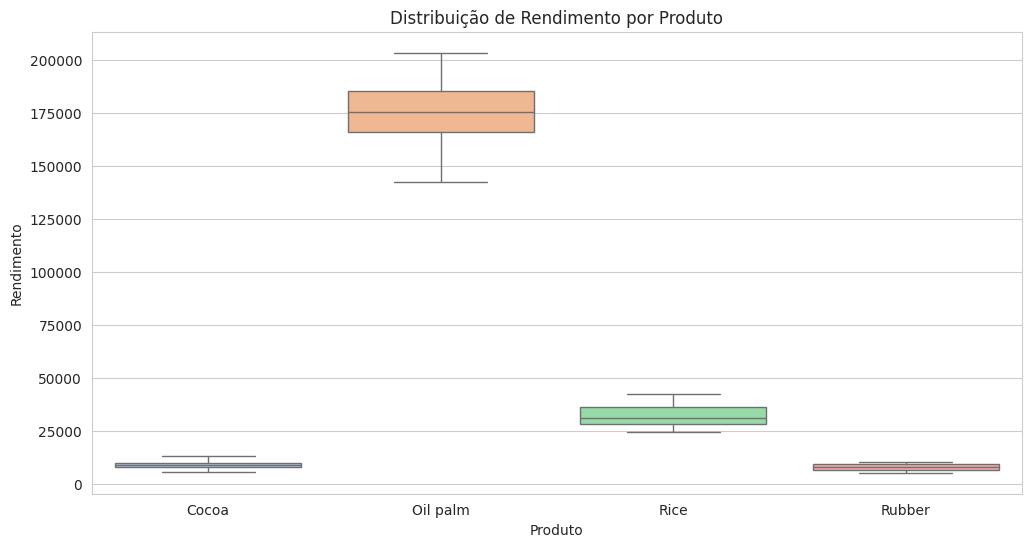

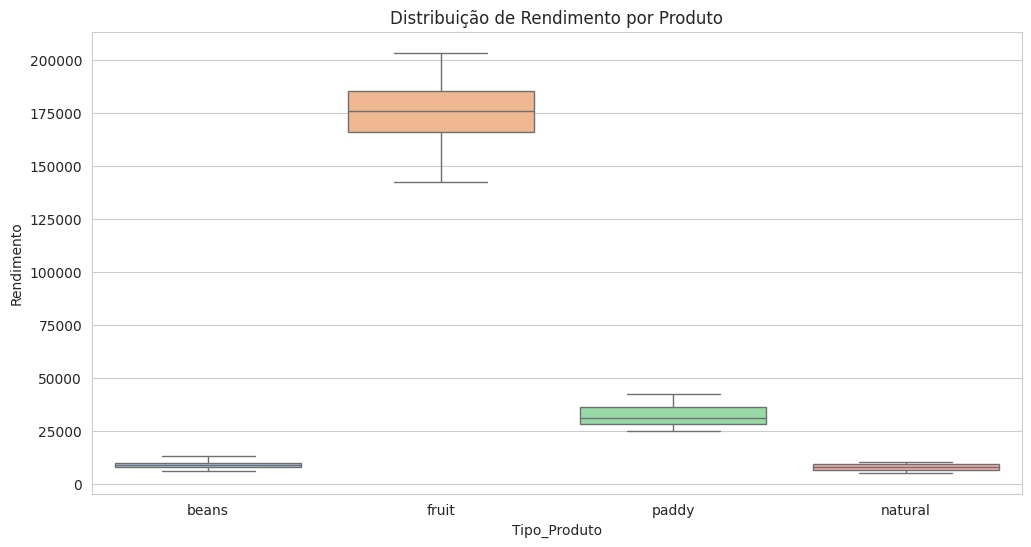

In [ ]:
#Entendendo rendimento por produto
plt.figure(figsize=(12, 6))
sns.boxplot(x='Produto', y='Rendimento', data=df, hue = 'Produto', palette='pastel', legend = False)
plt.title('Distribuição de Rendimento por Produto')
plt.xlabel('Produto')
plt.ylabel('Rendimento')
#plt.xticks(rotation=0)
plt.show()

#Entendendo rendimento por tipo produto
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo_Produto', y='Rendimento', data=df, hue = 'Tipo_Produto', palette='pastel', legend = False)
plt.title('Distribuição de Rendimento por Produto')
plt.xlabel('Tipo_Produto')
plt.ylabel('Rendimento')
#plt.xticks(rotation=0)
plt.show()


# **Analise explotoratória**

* As estatísticas descritivas mostram condições climáticas estáveis, em especial para Umidade (Especifica e Relativa) e Temperatura. Dado que a medida de amplitude (relativa) não varia mais do que 10% do minimo ao máximo.

* A variação de 60% na amplitude de Precipitação sugere estações chuvosas e secas com características bem marcadas, embora não seja possível aferir isso com bases em dados temporais.

* Observamos que há um grande número de produtos cujo o rendimento está abaixo das 25.000 ton/hec e outro grupo com rendimento superior a 125.000 ton/hec. Observando os boxplots por produto fica claro que o produto de alto rendimento é o Oléo de Palma, enquanto os demais pertencem ao primeiro grupo. Isso também fica evidente ao identificarmos os outliers do boxplot agregado.

* As condições de clima também seguem o mesmo padrão de comportamento dos rendimentos dos grupos citados acima, mas não idenfiticamos visualmente sub-grupos claros com as condições climáticas.

* Concluímos que o produto Oléo de Palma se diferencia dos demais em rendimento, mas a comparação direta das estatísticas descritivas isoladas sugere que não há diferenças climáticas significativas entre os cultivos.


#**3. Clusterização**

In [ ]:
#df apenas com métricas

numerical_columns = ['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura']
df_numerical = df[numerical_columns]

#Pré-processamento
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

print("DataFrame com colunas numéricas escaladas:\n", df_scaled[:5])
print("\n" +"="*50 + "\n")

DataFrame com colunas numéricas escaladas:
 [[-0.82341547 -1.64884495 -1.34708396 -0.66710937]
 [-1.89956502 -2.26322349 -2.64614077 -0.28280708]
 [-0.64104192 -1.34165569 -1.96136664  0.21678591]
 [ 0.36686484 -2.0242985   0.33464075 -2.39646972]
 [-0.49138608 -2.0242985  -0.62202899 -1.62786512]]




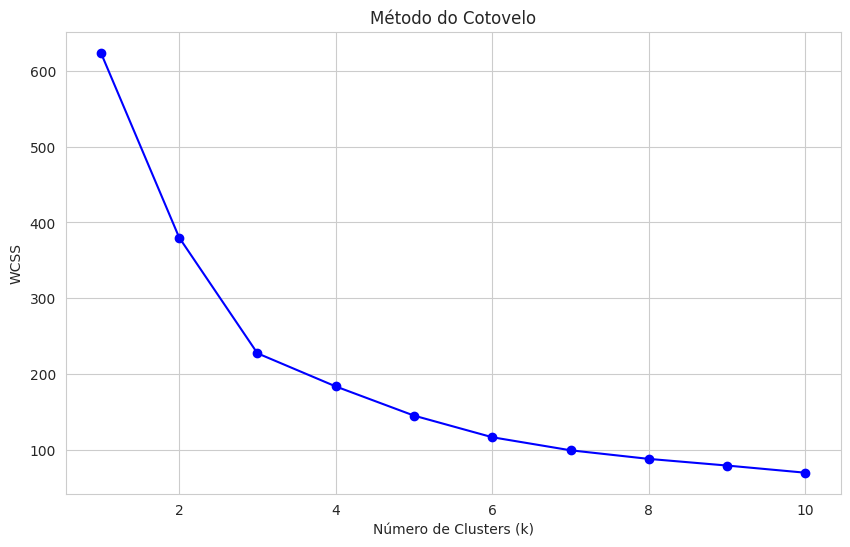

In [ ]:
#Método do Cotovelo

wcss = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


  #Gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
#Clusters

##número de clusters
k_ideal = 3

##modelagem
kmeans = KMeans(n_clusters=k_ideal, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

##pts por cluster
print("Distribuição de pontos por cluster:\n")
print(df['Cluster'].value_counts())
print("\n" +"="*50 + "\n")

##analise geral
cluster_analysis = df.groupby('Cluster')[numerical_columns].mean()
print("Análise de cada cluster:\n")
print(cluster_analysis)

##analise por produto
cluster_product_analysis = df.groupby(['Cluster', 'Produto']).agg(lambda x: x.mode()[0])
print("\n Análise de cada cluster por produto:")
print(cluster_product_analysis)


Distribuição de pontos por cluster:

Cluster
0    68
1    44
2    44
Name: count, dtype: int64


Análise de cada cluster:

         Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura
Cluster                                                                 
0         2733.517647           18.337647         85.652353    26.118824
1         2232.217273           17.805455         83.916364    25.986364
2         2359.024545           18.392727         84.145455    26.480909

 Análise de cada cluster por produto:
                  Precipitacao  Umidade_Especifica  Umidade_Relativa  \
Cluster Produto                                                        
0       Cocoa          2414.79               18.38             84.98   
        Oil palm       2414.79               18.38             84.98   
        Rice           2414.79               18.38             84.98   
        Rubber         2414.79               18.38             84.98   
1       Cocoa          1934.62           

In [ ]:
#Métricas de Avaliação da Clusterização

#Silhouette Score

if len(df['Cluster'].unique()) > 1:
    silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
    print(f"Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Não é possível calcular o Silhouette Score com apenas 1 cluster.")


#Davies-Bouldin Index

davies_bouldin_avg = davies_bouldin_score(df_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.3f}")



Silhouette Score: 0.435
Davies-Bouldin Index: 0.888


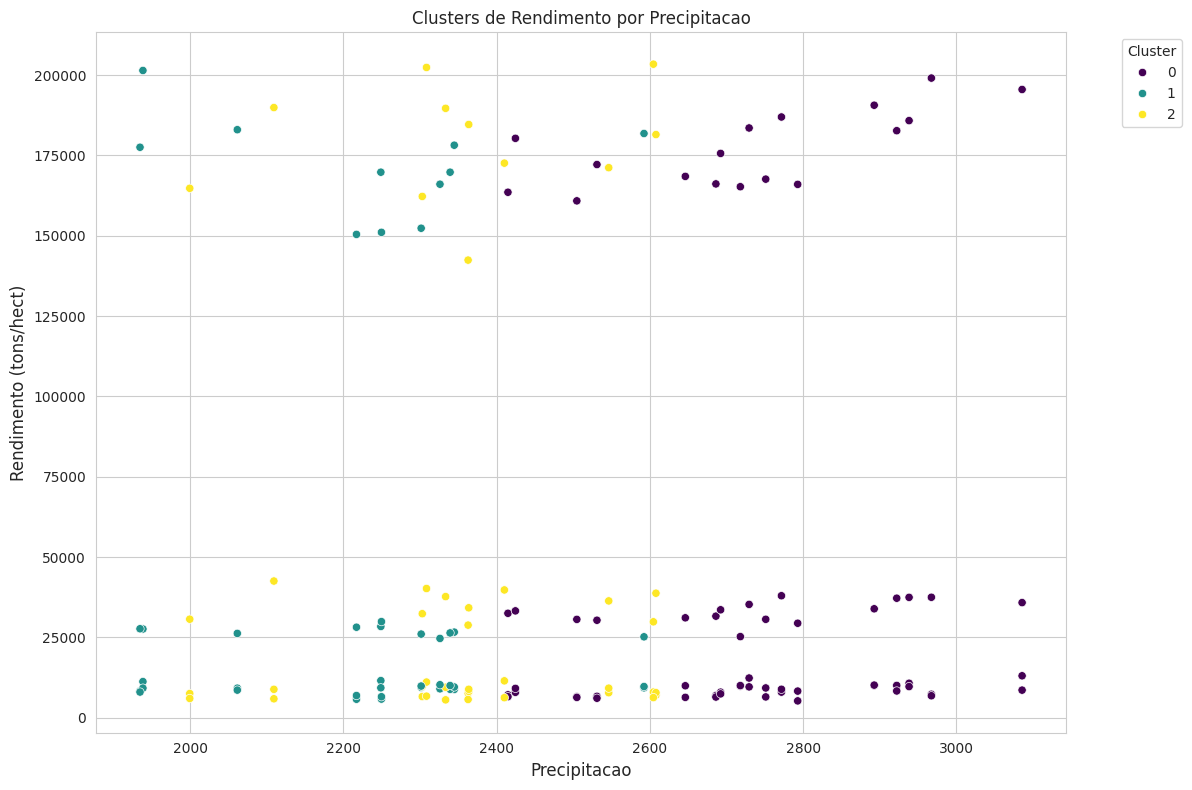

In [ ]:
#grafico Clusters

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x = "Precipitacao",
    y = "Rendimento",
    hue = "Cluster",
    data = df,
    palette = "viridis",
    legend = "full"
)

plt.title("Clusters de Rendimento por Precipitacao")
plt.xlabel("Precipitacao", fontsize = 12)
plt.ylabel("Rendimento (tons/hect)", fontsize = 12)
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1) ,loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


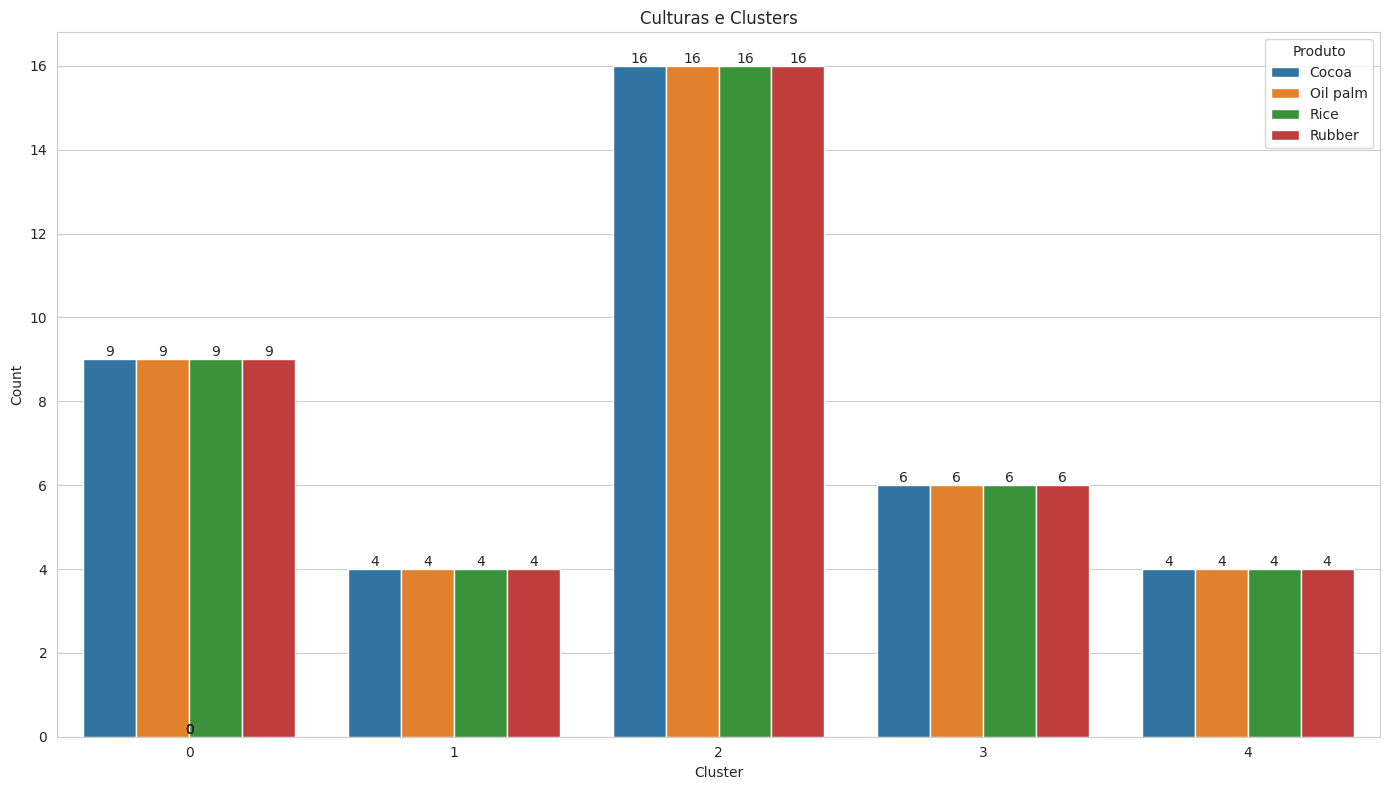

In [ ]:
#Culturas e Clusters

df_cluster_product = df.groupby(['Cluster', 'Produto']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Cluster', y='Count', hue='Produto', data=df_cluster_product)
plt.title('Culturas e Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Produto')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # Posição X do texto (no centro da barra)
        height,                          # Posição Y do texto (no topo da barra)
        f'{int(height)}',                # O texto a ser exibido, formatado como inteiro
        ha='center',                     # Alinhamento horizontal: centralizado
        va='bottom'                      # Alinhamento vertical: na parte de baixo
    )

plt.tight_layout()
plt.show()

In [ ]:
#Entendendo os Outliers a partir dos clusters

centroids = kmeans.cluster_centers_

distances = [
    np.linalg.norm(df_scaled[i] - centroids[df['Cluster'][i]])
    for i in range(len(df_scaled))
             ]
df['Distancia_Centroides'] = distances

#outliers

outlier_threshold = df['Distancia_Centroides'].quantile(0.95)

outliers = df[df['Distancia_Centroides'] > outlier_threshold].sort_values(by='Distancia_Centroides', ascending=False)

print("Outliers")
print(outliers)


Outliers
     Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  \
36        2967.41               18.67             85.48        26.46   
75        2967.41               18.67             85.48        26.46   
153       2967.41               18.67             85.48        26.46   
114       2967.41               18.67             85.48        26.46   
54        2414.79               18.18             85.76        25.93   
15        2414.79               18.18             85.76        25.93   
93        2414.79               18.18             85.76        25.93   
132       2414.79               18.18             85.76        25.93   

     Rendimento   Produto Tipo_Produto  Cluster  Distancia_Centroides  
36         7314     Cocoa        beans        2              1.900500  
75       199074  Oil palm        fruit        2              1.900500  
153        6842    Rubber      natural        2              1.900500  
114       37496      Rice        paddy        2       

# **Analise de Clusters - Insights**

* O método do cotovelo sugeriu que o número ideal de Cluster está entre 4 e 6 Clusters. Inicialamente, testamos 5 clusters, mas ao analisar os resultados comparativamente entendemos que 3 clusters seriam para emergir os principais insigths dos dados.

Desta forma, inicialmente optamos pelo construção de 5 clusters distintos, onde:

    * Cluster Verde Ciano (0): baixa precipitação e rendimento
    * Clusters Amarelo (2): sugerem uma região intermediária de cultivo com relação a rendimento e precipitação. Aqui podemos observar a quebra visual mais acentuada entre os grupo de alto rendimento (como visto puxado pelo Oléo de Palma) e os demais produtos.
    * Cluster Azul (1): culturas que possuem rendimento frente a maior precipitação.
  
* A analise dos números sugere que a Precitação foi a variavel com maior distinção entre os clusters para predizer o rendimento, dada que a variação as demais como umidade de temperatura foi menor frente a ela.

* Com relação as métricas de avaliação dos clusters observou-se um desempenho moderado dos indicadores. Entendemos que a opção pela redução do número de cluster garantiu melhor inteligibilidade dos clusters, porém penalizou a diferenciação entre ele (Davies-Bouldin Index), contudo a redução de 5 para 3 cluster aumentou um pouco mais de 1 pp. o Silhouette Score.

          * Silhouette Score: 0.435 - Sugerindo uma coesão razoável entre cluster
          * Davies-Bouldin Index: 0.888 - Sugerindo uma dispersão maior entre clusters.

* Entre os clusters houve uma maior incidencia de produtos nos cluster 0 e 2. A analise outliers a partir dos centroídes sugeriu 8 pontos de outliers.

* Logo, do ponto de vista interpretativo entendemos que os clusters acima apresentou alguns insigths relevantes. Sugerimos que os cluster sejam divididos os subgrupos de alto e baixo rendimento na analise dos agrupamentos dos clusters.

#**4. Predição do rendimento da safra**

In [ ]:
#Variaveis preditoras e variável-alvo

X = df.drop('Rendimento', axis=1)
y = df['Rendimento']

#Enconding

categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#Check

print("Dataframe X após o encoding:")
print(X.head())
print("\n" + "="*50 + "\n")


Dataframe X após o encoding:
   Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  Cluster  \
0       2248.92               17.72             83.40        26.01        1   
1       1938.42               17.54             82.11        26.11        1   
2       2301.54               17.81             82.79        26.24        1   
3       2592.35               17.61             85.07        25.56        4   
4       2344.72               17.61             84.12        25.76        4   

   Distancia_Centroides  Produto_Oil palm  Produto_Rice  Produto_Rubber  \
0              0.859662             False         False           False   
1              1.250818             False         False           False   
2              0.812029             False         False           False   
3              1.279944             False         False           False   
4              0.478056             False         False           False   

   Tipo_Produto_fruit  Tipo_Produto_natural  

In [ ]:
#Split treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensões de conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensões de conjunto de teste (X_test): {X_test.shape}")


Dimensões de conjunto de treino (X_train): (124, 12)
Dimensões de conjunto de teste (X_test): (32, 12)


In [ ]:
#regressão linear simples

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("Previsões de rendimento com Regressão Linear Simples:")
print(y_pred_lr)
print("\n" + "="*50 + "\n")

#metricas de avaliação do modelo
r2_lr = r2_score(y_test, y_pred_lr)
print(f"R2 Regressão Linear Simples: {r2_lr}")

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"MSE Regressão Linear Simples: {mse_lr}")

Previsões de rendimento com Regressão Linear Simples:
[ 31989.65089988 178481.02456821  31449.20041174 174596.68624385
  37943.54946998  11809.3194906   27994.77748691   6579.33118431
  30785.04036081   7103.03427554   8171.85279004  31640.14007042
   7764.53177885   6028.15096321   6191.04792248  11683.21777544
   9136.36060978  29263.26398149  11134.51379841  31716.86428477
  30352.96144647   8969.14231793   8619.63148847   6457.1659094
  11765.3217262   30822.25611117 178607.12628337 171772.07569772
 175417.43828124  31192.361372   172970.34504294  10498.0171809 ]


R2 Regressão Linear Simples: 0.9950911001844304
MSE Regressão Linear Simples: 19041483.303420734


In [ ]:
#Decision Tree Regression

model_dt= DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("Previsões de rendimento com Decision Tree Regression:")

#metricas
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R2 Decision Tree Regression: {r2_dt}")

mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"MSE Decision Tree Regression: {mse_dt}")


Previsões de rendimento com Decision Tree Regression:
R2 Decision Tree Regression: 0.9862039261886789
MSE Decision Tree Regression: 53514579.4375


In [ ]:
#Random Forest

model_rf = RandomForestRegressor(n_estimators=100,random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("Previsões de rendimento com Random Forest:")

#metricas
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R2 Random Forest: {r2_rf}")
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"MSE Random Forest: {mse_rf}")




Previsões de rendimento com Random Forest:
R2 Random Forest: 0.9957892659651764
MSE Random Forest: 16333318.020656265


In [ ]:
#Gradient Boosting Regressor

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,random_state=42)
model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

print(f"Previsões de rendimento com Gradient Boosting Regressor:")

r2_gb = r2_score(y_test, y_pred_gb)
print(f"R2 Gradient Boosting Regressor: {r2_gb}")

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"MSE Gradient Boosting Regressor: {mse_gb}")

Previsões de rendimento com Gradient Boosting Regressor:
R2 Gradient Boosting Regressor: 0.9930100745145735
MSE Gradient Boosting Regressor: 27113722.91623346


In [ ]:
#Support Vector Regressor (SVR)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

##Fit do modelo

model_svr = SVR(kernel='rbf', C=100, gamma="auto")
model_svr.fit(X_train_scaled, y_train_scaled)

y_pred_svr_scaled = model_svr.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).flatten()

print("Previsões de rendimento com SVR:")
print(y_pred_svr)

#metricas
r2_svr = r2_score(y_test, y_pred_svr)
print(f"R2 SVR: {r2_svr}")

mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"MSE SVR: {mse_svr}")


Previsões de rendimento com SVR:
[ 3.29074377e+04  1.79341192e+05  2.94439938e+04  1.72676702e+05
  4.63233048e+04  1.08571606e+03  3.74656598e+04  1.25227139e+04
  3.59674101e+04  1.00343692e+04  1.29701720e+04  2.57397717e+04
  1.39299476e+04  1.43442163e+04  1.54889588e+04  9.04959571e+03
  3.59457105e+03  3.61866463e+04  1.77086456e+04  2.53341015e+04
  3.45104429e+04  1.05491374e+04 -1.23204825e+03  6.07317912e+03
 -4.36398098e+00  3.69895577e+04  1.81514655e+05  1.65732132e+05
  1.69673465e+05  3.42278792e+04  1.58450014e+05  8.62299753e+03]
R2 SVR: 0.9897835549677922
MSE SVR: 39629300.822983794


#5.**Comparação entre modelos**

In [ ]:
# Dicionário com os nomes dos modelos e seus respectivos R-quadrado e MSE
model_performance = {
    'Modelo': ['Regressão Linear', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR'],
    'R-Quadrado': [r2_lr, r2_dt, r2_rf, r2_gb, r2_svr],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb, mse_svr]
}

# Criando um DataFrame para facilitar a visualização
df_performance = pd.DataFrame(model_performance)

print("Tabela de Performance dos Modelos:")
print(df_performance)

Tabela de Performance dos Modelos:
              Modelo  R-Quadrado           MSE
0   Regressão Linear    0.995091  1.904148e+07
1      Decision Tree    0.986204  5.351458e+07
2      Random Forest    0.995789  1.633332e+07
3  Gradient Boosting    0.993010  2.711372e+07
4                SVR    0.989784  3.962930e+07


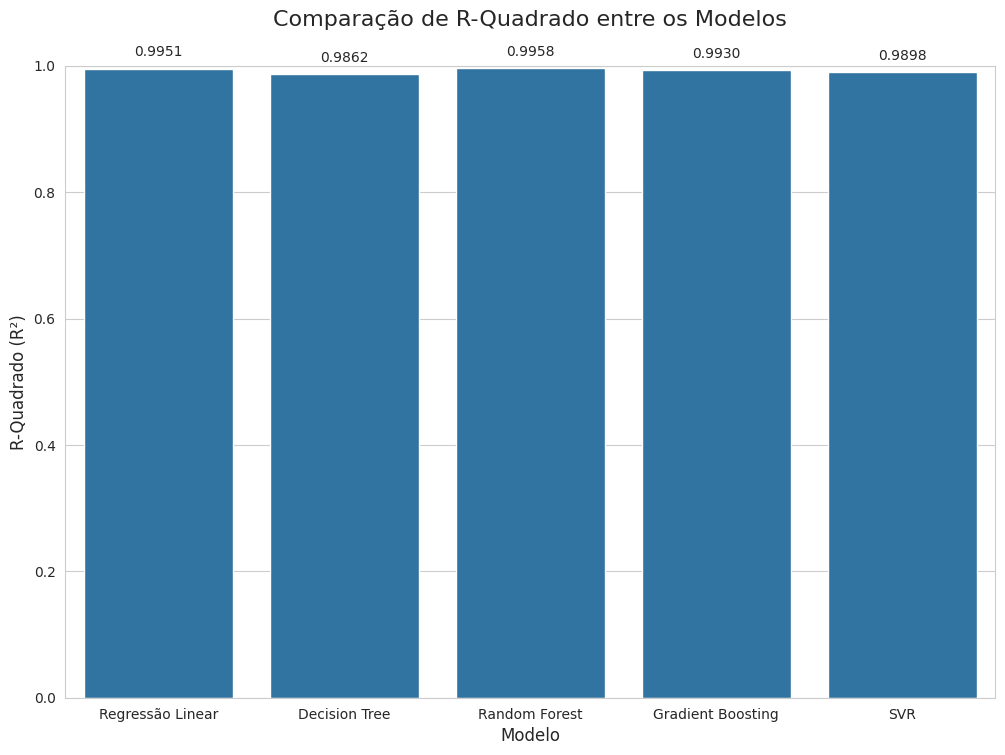

In [ ]:
# Gráfico do R-Quadrado
plt.figure(figsize=(12, 8))
sns.barplot(x='Modelo', y='R-Quadrado', data=df_performance)
plt.title('Comparação de R-Quadrado entre os Modelos', fontsize=16, y=1.05)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('R-Quadrado (R²)', fontsize=12)
plt.ylim(0, 1.0) # O R-quadrado varia de 0 a 1
plt.xticks(rotation=0)

# Add valores nas barras
for index, value in enumerate(df_performance['R-Quadrado']):
    plt.text(index, value + 0.02, f'{value:.4f}', ha='center')
plt.subplots_adjust(top=0.9)
plt.show()

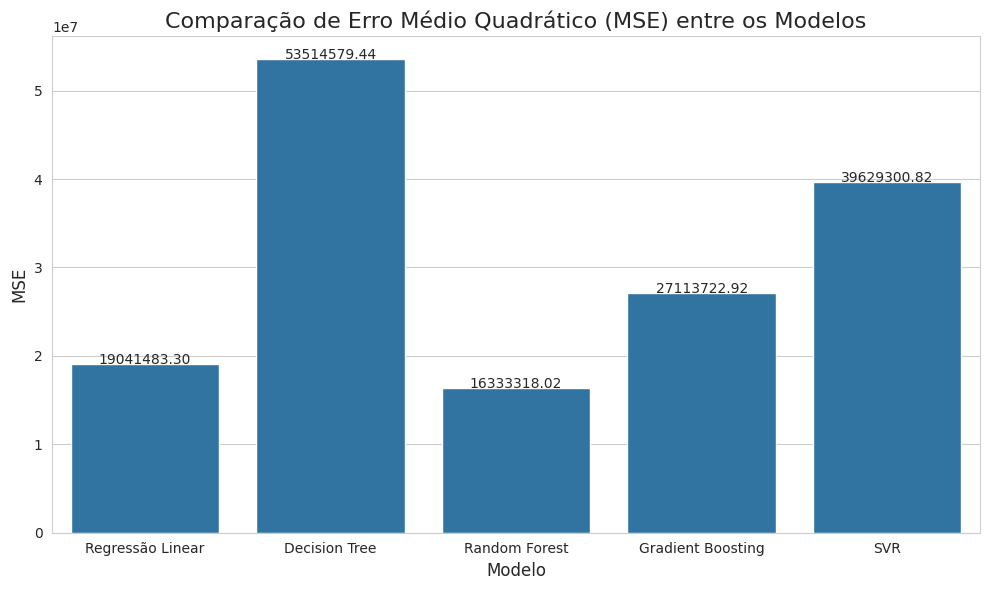

In [ ]:
# Gráfico do MSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='MSE', data=df_performance)
plt.title('Comparação de Erro Médio Quadrático (MSE) entre os Modelos', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.xticks(rotation=0)

# Add valores nas barras
for index, value in enumerate(df_performance['MSE']):
    plt.text(index, value + 10, f'{value:.2f}', ha='center')
plt.tight_layout()
plt.show()



In [ ]:
#Previsões do Modelo vencedor: Regressão Linear - visão tabela

test_df = df.loc[y_test.index].copy()
test_df['Rendimento Predito'] = y_pred_lr

df_comparacao = test_df.groupby('Produto')[['Rendimento', 'Rendimento Predito']].mean()

print("Tabela de comparação entre Rendimentoo médio Real vs Predito por cultura:")
print(df_comparacao)

Tabela de comparação entre Rendimentoo médio Real vs Predito por cultura:
             Rendimento  Rendimento Predito
Produto                                    
Cocoa       8268.444444         9047.914578
Oil palm  174942.666667       175307.449353
Rice       31434.545455        31377.278718
Rubber      8069.333333         8413.234669


<Figure size 1200x800 with 0 Axes>

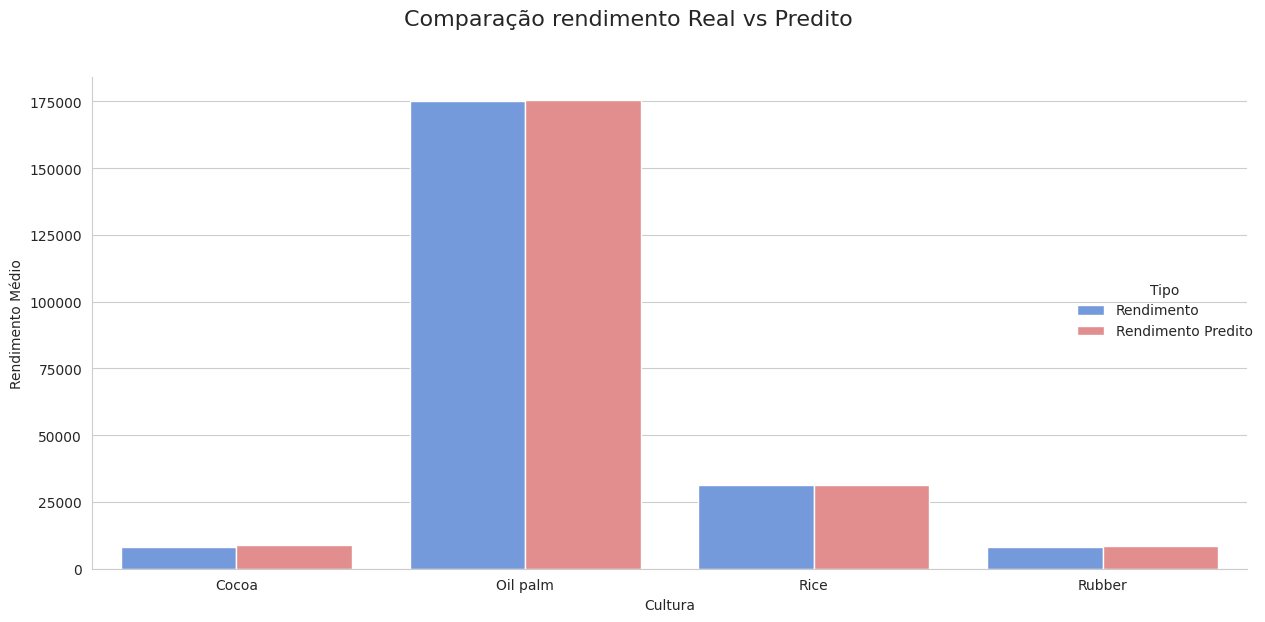

In [ ]:
#Previsões do Modelo vencedor: Regressão Linear - gráfico

df_comparacao_reset = df_comparacao.reset_index()

df_long = pd.melt(df_comparacao_reset, id_vars='Produto', var_name='Tipo', value_name='Valor')

sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
g = sns.catplot(x='Produto', y='Valor', hue='Tipo', data=df_long, kind= 'bar', palette=['cornflowerblue', 'lightcoral'], height=6, aspect=1.8)

g.set_axis_labels('Cultura', 'Rendimento Médio')
g.fig.suptitle('Comparação rendimento Real vs Predito', fontsize=16, y=1.03)

plt.tight_layout()
plt.show()

# **Conclusões sobre os modelos**

* A comparação entre o R² e MSE dos modelos sugere que a Random Forest (RF) foi capaz de entregar o maior R² e o menor MSE entre todos os modelos. Contudo, a Regressão Linear (LR) apresentou indicadores muito semelhantes, com diferenças pequenas em relação a ambas as métricas quando comparada a RF.

* Dada a melhor inteligibilidade do LR e menor custo computacional elegemos ela como o modelo vencedor para predição do rendimento da safra.

* Assim, com base nele realizamos uma comparação entre valores preditos e reais e identificamos uma margem de precisão aceitável.